# Детекция
С использованием библиотеки MMDetection https://github.com/open-mmlab/mmdetection

**1.Скачиваем необходимые данные**

In [6]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [7]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.4 MB/s eta 0:14:24tcmalloc: large alloc 1147494400 bytes == 0x39a58000 @  0x7f1c5880f615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:10tcmalloc: large alloc 1434370048 bytes == 0x7e0ae000 @  0x7f1c5880f615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████

In [8]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'linux',
 'Python': '3.7.14 (default, Sep  8 2022, 00:06:44) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.2, V11.2.152',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86

In [9]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.25.2
11.1
GCC 7.3


In [10]:
# Создаем директорию для весов моделей
!mkdir checkpoints

Sparse R-CNN weights

In [11]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth \
      -O checkpoints/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth

--2022-10-15 09:47:07--  https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.92
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501930765 (479M) [application/octet-stream]
Saving to: ‘checkpoints/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth’

checkpoints/sparse_ 100%[===================>] 478.68M  15.3MB/s    in 36s     

2022-10-15 09:47:44 (13.2 MB/s) - ‘checkpoints/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth’ saved [501930765/501930765]



Mask R-CNN weights

In [12]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth \
      -O checkpoints/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth

--2022-10-15 09:47:44--  https://download.openmmlab.com/mmdetection/v2.0/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.92
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276996842 (264M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth’

checkpoints/mask_rc 100%[===================>] 264.16M  10.7MB/s    in 27s     

2022-10-15 09:48:11 (9.80 MB/s) - ‘checkpoints/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth’ saved [276996842/276996842]



TOOD weights

In [13]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/tood/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth \
      -O checkpoints/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth

--2022-10-15 09:48:12--  https://download.openmmlab.com/mmdetection/v2.0/tood/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.92
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215053881 (205M) [application/octet-stream]
Saving to: ‘checkpoints/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth’

checkpoints/tood_r1 100%[===================>] 205.09M  24.8MB/s    in 8.7s    

2022-10-15 09:48:20 (23.6 MB/s) - ‘checkpoints/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth’ saved [215053881/215053881]



**2.Обработка изображения разными моделями**

In [14]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import mmcv
import cv2

Mask R-CNN, Swin backbone

In [15]:
# Choose to use a config and initialize the detector
config = 'configs/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: checkpoints/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco_20210903_104808-b92c91f1.pth


/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


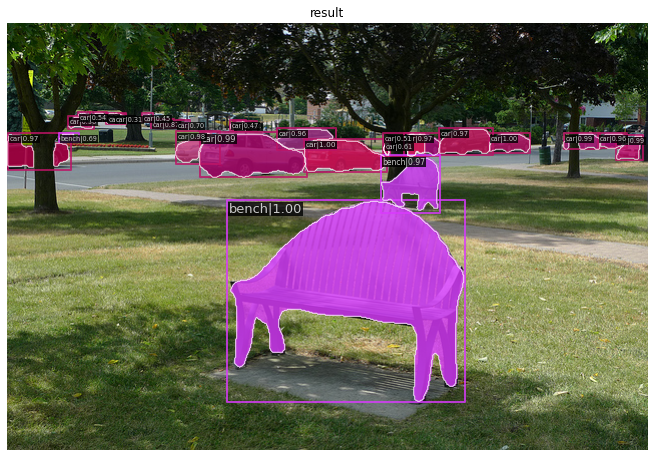

In [16]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

Sparce R-CNN, ResNet101 backbone

In [17]:
# Choose to use a config and initialize the detector
config = 'configs/sparse_rcnn/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: checkpoints/sparse_rcnn_r101_fpn_300_proposals_crop_mstrain_480-800_3x_coco_20201223_023452-c23c3564.pth


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


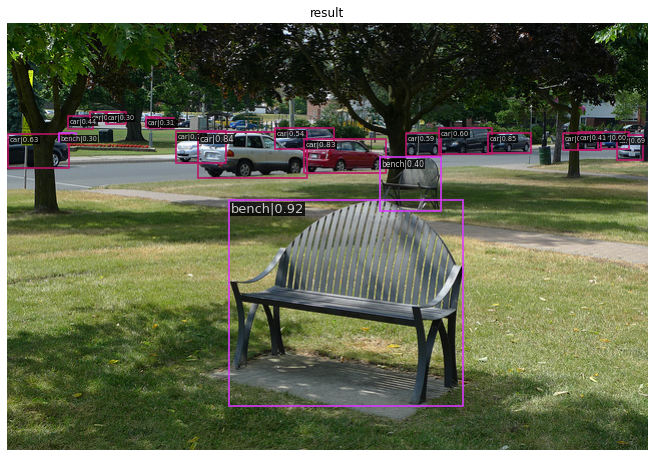

In [18]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

TOOD, ResNet101 backbone

In [19]:
# Choose to use a config and initialize the detector
config = 'configs/tood/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

2022-10-15 09:50:31,083 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
2022-10-15 09:50:31,089 - root - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
2022-10-15 09:50:31,095 - root - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
2022-10-15 09:50:31,100 - root - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
2022-10-15 09:50:31,106 - root - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
2022-10-15 09:50:31,112 - root - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
2022-10-15 09:50:31,117 - root - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
2022-10-15 09:50:31,123 - root - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
2022-10-15 09:50:31,128 - root - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 

load checkpoint from local path: checkpoints/tood_r101_fpn_dconv_c3-c5_mstrain_2x_coco_20211210_213728-4a824142.pth


2022-10-15 09:50:31,190 - root - INFO - ModulatedDeformConvPack backbone.layer3.15.conv2 is upgraded to version 2.
2022-10-15 09:50:31,197 - root - INFO - ModulatedDeformConvPack backbone.layer3.16.conv2 is upgraded to version 2.
2022-10-15 09:50:31,203 - root - INFO - ModulatedDeformConvPack backbone.layer3.17.conv2 is upgraded to version 2.
2022-10-15 09:50:31,208 - root - INFO - ModulatedDeformConvPack backbone.layer3.18.conv2 is upgraded to version 2.
2022-10-15 09:50:31,213 - root - INFO - ModulatedDeformConvPack backbone.layer3.19.conv2 is upgraded to version 2.
2022-10-15 09:50:31,219 - root - INFO - ModulatedDeformConvPack backbone.layer3.20.conv2 is upgraded to version 2.
2022-10-15 09:50:31,225 - root - INFO - ModulatedDeformConvPack backbone.layer3.21.conv2 is upgraded to version 2.
2022-10-15 09:50:31,230 - root - INFO - ModulatedDeformConvPack backbone.layer3.22.conv2 is upgraded to version 2.
2022-10-15 09:50:31,237 - root - INFO - ModulatedDeformConvPack backbone.layer4.

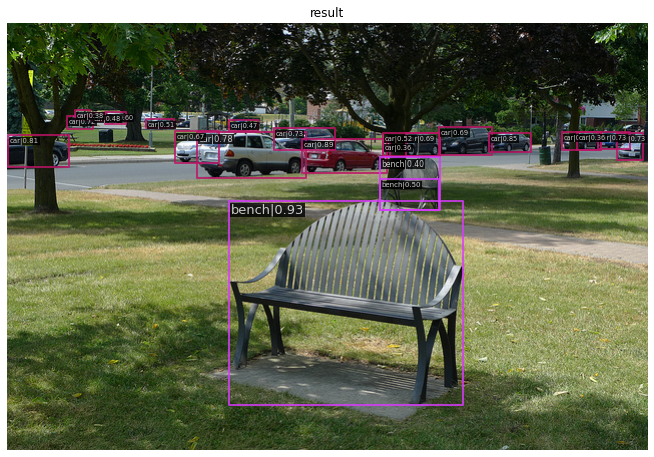

In [20]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)